In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis, skew



In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Data_Analysis_Projects/my_data_analysis_project/data/raw/cleaned_laptop_data_no_processor.csv")

In [5]:
df.head()

,Brand,Spec_Score,Model_Name,Series,Price,Price_Range,Utility,Processor_Brand,Core Configuration,Clock-speed,OS Type,RAM Type,Ram_Capacity(GB),Graphics_Brand,Display Size (Inches),Resolution Width,Resolution Height,PPI,Aspect Ratio,Weight(kg),Touchscreen,Screen_Protection,Colour(s),Outlier_Flag,Original_Brand
0,Acer,7.2,one 14 z8415,one,34990.0,Economy,Everyday Use,Intel,Quad Core,2.5,Windows,DDR4,16,Intel,14.0,1920,1080,157.35,1.78,1.49,No,Yes,Silver,0,Acer
1,HP,4.2,15fc0026au,15fc0026au,36990.0,Economy,Everyday Use,AMD,Quad Core,2.4,Windows,LPDDR5,8,AMD,15.6,1920,1080,141.21,1.78,1.75,No,Yes,Silver,0,HP
2,HP,5.1,15sfq5007tu,15sfq5007tu,37166.0,Economy,Everyday Use,Intel,Hexa Core,4.2,Windows,DDR4,8,Intel,15.6,1920,1080,141.21,1.78,1.69,No,Yes,Silver,0,HP
3,Acer,8.0,predator helios neo 16 phn1671,predator,112980.0,Premium,Everyday Use,Intel,Octa Core,2.1,Windows,DDR5,16,NVIDIA,16.0,1920,1200,141.51,1.60,2.60,No,No,Black,0,Acer
4,Asus,5.4,tuf gaming f17 fx706hf,tuf,57990.0,Economy,Everyday Use,Intel,Hexa Core,2.7,Windows,DDR4,8,NVIDIA,17.3,1920,1080,127.34,1.78,2.60,No,Yes,Black,0,Asus


In [6]:
df.isnull().sum()

Brand                    0
Spec_Score               0
Model_Name               0
Series                   0
Price                    0
Price_Range              0
Utility                  0
Processor_Brand          0
Core Configuration       0
Clock-speed              0
OS Type                  0
RAM Type                 0
Ram_Capacity(GB)         0
Graphics_Brand           0
Display Size (Inches)    0
Resolution Width         0
Resolution Height        0
PPI                      0
Aspect Ratio             0
Weight(kg)               0
Touchscreen              0
Screen_Protection        0
Colour(s)                0
Outlier_Flag             0
Original_Brand           0
dtype: int64

In [7]:
df.duplicated().sum()

6

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  2669 non-null   object 
 1   Spec_Score             2669 non-null   float64
 2   Model_Name             2669 non-null   object 
 3   Series                 2669 non-null   object 
 4   Price                  2669 non-null   float64
 5   Price_Range            2669 non-null   object 
 6   Utility                2669 non-null   object 
 7   Processor_Brand        2669 non-null   object 
 8   Core Configuration     2669 non-null   object 
 9   Clock-speed            2669 non-null   float64
 10  OS Type                2669 non-null   object 
 11  RAM Type               2669 non-null   object 
 12  Ram_Capacity(GB)       2669 non-null   int64  
 13  Graphics_Brand         2669 non-null   object 
 14  Display Size (Inches)  2669 non-null   float64
 15  Reso

In [9]:
# Convert specified object columns to categorical data types
categorical_columns = [
    'Brand', 'Series', 'Price_Range', 'Utility', 'Processor_Brand', 'Core Configuration',
    'OS Type', 'RAM Type', 'Graphics_Brand', 'Touchscreen', 'Screen_Protection', 'Colour(s)', 'Original_Brand'
]

for column in categorical_columns:
    df[column] = df[column].astype('category')

# Verify the changes
df_info_updated = df.info()
df_info_updated


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Brand                  2669 non-null   category
 1   Spec_Score             2669 non-null   float64 
 2   Model_Name             2669 non-null   object  
 3   Series                 2669 non-null   category
 4   Price                  2669 non-null   float64 
 5   Price_Range            2669 non-null   category
 6   Utility                2669 non-null   category
 7   Processor_Brand        2669 non-null   category
 8   Core Configuration     2669 non-null   category
 9   Clock-speed            2669 non-null   float64 
 10  OS Type                2669 non-null   category
 11  RAM Type               2669 non-null   category
 12  Ram_Capacity(GB)       2669 non-null   int64   
 13  Graphics_Brand         2669 non-null   category
 14  Display Size (Inches)  2669 non-null   f

Let's start with the univariate analysis of the Price column since it is an important target variable in our dataset. Here are the steps we will take:


Summary Statistics: Get a summary of the Price column to understand its central tendency and dispersion.

Distribution Plot: Visualize the distribution of the Price column using a histogram and a box plot to identify any skewness and outliers.

Identify Outliers: Use statistical methods to identify potential outliers in the Price column.

In [10]:
# Calculate kurtosis and skewness for the Price column
price_kurtosis = kurtosis(df['Price'])
price_skewness = skew(df['Price'])

price_kurtosis, price_skewness


(7.140159894822064, 2.3605869451555743)

Kurtosis: A value of 7.14 indicates a leptokurtic distribution. This means the Price column has a distribution with heavy tails and a sharp peak, suggesting the presence of outliers.

Skewness: A value of 2.36 indicates a positively skewed distribution. This confirms our earlier observation from the histogram that the Price distribution is right-skewed, with a long tail extending towards higher prices.

In [11]:
# Summary statistics for the Price column
price_summary = df['Price'].describe()
price_summary


count      2669.000000
mean      82521.865118
std       59564.044352
min       13990.000000
25%       44990.000000
50%       64990.000000
75%       96900.000000
max      489883.000000
Name: Price, dtype: float64

Insights
The average price of laptops in this dataset is approximately 82,521.87.
There is a wide range of prices, with a standard deviation of 59,564.04, indicating substantial variability.

The median price (64,990.00) is lower than the mean, suggesting a right-skewed distribution.

The minimum price is 13,990.00, and the maximum price is 489,883.00, showing a significant range in laptop prices.

Distribution Plot

Next, let's visualize the distribution of the Price column using a histogram and a box plot. This will help us see the spread and identify any skewness and potential outliers.


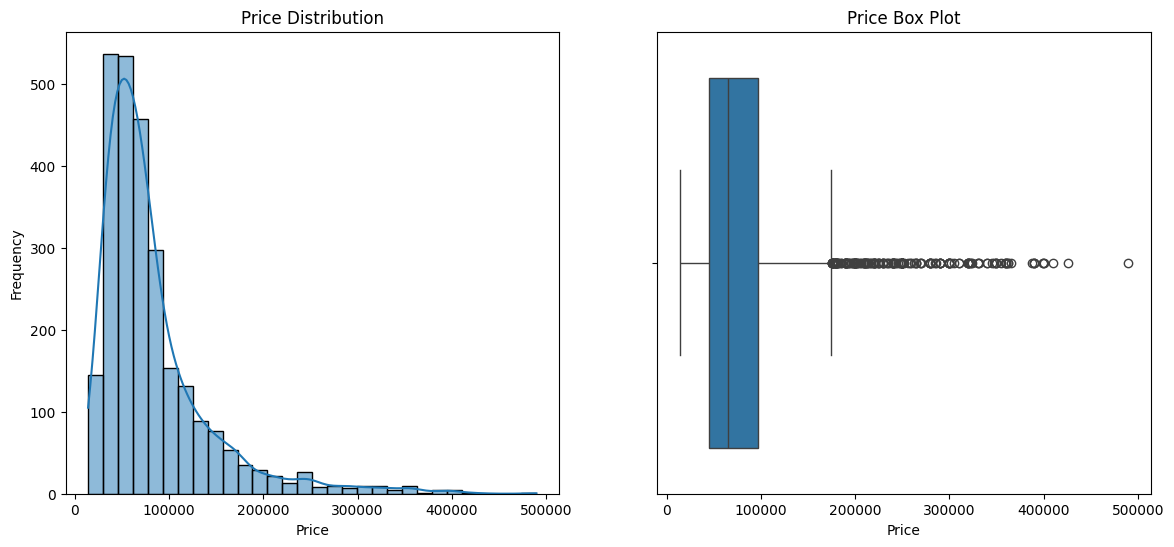

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price'])
plt.title('Price Box Plot')
plt.xlabel('Price')

plt.show()


In [13]:
# Distribution Plot (Histogram with KDE)
fig1 = px.histogram(df, x='Price', nbins=30, marginal='violin', title='Price Distribution with KDE')
fig1.update_layout(xaxis_title='Price', yaxis_title='Frequency')

# Box Plot
fig2 = go.Figure()
fig2.add_trace(go.Box(y=df['Price'], name='Price', boxpoints='all', jitter=0.5, pointpos=-1.8))
fig2.update_layout(title='Price Box Plot', yaxis_title='Price')

# To show the plots
fig1.show()
fig2.show()


Identify Outliers
We can identify potential outliers statistically using the IQR method. Outliers are typically defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [14]:
# Calculate IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

lower_bound, upper_bound, outliers
outliers.shape


(185, 25)

let's start with a detailed analysis of the Brand column using Matplotlib. We'll visualize the distribution of the brands in the dataset.


Step-by-Step Plan
Frequency Distribution: Plot a bar chart to show the frequency of each brand.

Pie Chart: Visualize the proportion of each brand in the dataset.

In [15]:
# Frequency distribution of the Brand column
brand_counts = df['Brand'].value_counts()

# Bar chart
fig_bar = px.bar(brand_counts, x=brand_counts.index, y=brand_counts.values,
                 title='Frequency Distribution of Laptop Brands',
                 labels={'x': 'Brand', 'y': 'Count'},
                 color=brand_counts.index,
                 color_discrete_sequence=px.colors.qualitative.Pastel)

fig_bar.update_layout(xaxis_title='Brand', yaxis_title='Count', xaxis_tickangle=-45)
fig_bar.show()


In [16]:
# Pie chart
fig_pie = px.pie(values=brand_counts.values, names=brand_counts.index,
                 title='Proportion of Laptop Brands',
                 color_discrete_sequence=px.colors.qualitative.Pastel)

fig_pie.update_traces(textinfo='percent+label')
fig_pie.show()


Insights from the Top 5 Brands Pie Chart

The pie chart shows the market share of the top 5 leading laptop brands in the dataset. HP, Dell, and Lenovo have the largest shares, followed by Asus and Acer.

In [17]:
# Get the top 5 brands
top_5_brands = brand_counts.head(5)
# Pie chart for top 5 brands
fig_top5_pie = px.pie(values=top_5_brands.values, names=top_5_brands.index,
                      title='Market Share of Top 5 Laptop Brands',
                      color_discrete_sequence=px.colors.qualitative.Pastel)

fig_top5_pie.update_traces(textinfo='percent+label')
fig_top5_pie.show()

Insights from the Pie Chart of Top 5 Brands and Remaining Brands

The pie chart displays the market share of the top 5 leading laptop brands and groups all remaining brands under the "Other" category.

This gives a clear view of how dominant the top 5 brands are compared to the rest of the market.

In [18]:
# Calculate market share for remaining brands (excluding top 5)
remaining_brands = brand_counts[5:]

# Pie chart for remaining brands
fig_remaining_pie = px.pie(values=remaining_brands.values, names=remaining_brands.index,
                           title='Market Share of Remaining Laptop Brands',
                           color_discrete_sequence=px.colors.qualitative.Pastel)

fig_remaining_pie.update_traces(textinfo='percent+label')
fig_remaining_pie.show()


In [19]:
# Data preparation
top_10_brands = brand_counts.head(10)
top_5_brands = top_10_brands.head(5)
next_5_brands = top_10_brands[5:]

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Add first pie chart for top 5 brands
fig.add_trace(go.Pie(
    labels=top_5_brands.index,
    values=top_5_brands.values,
    name="Top 5 Brands",
    textinfo='label+percent',
    insidetextorientation='radial'
), 1, 1)

# Add second pie chart for next 5 brands
fig.add_trace(go.Pie(
    labels=next_5_brands.index,
    values=next_5_brands.values,
    name="Next 5 Brands",
    textinfo='label+percent',
    insidetextorientation='radial'
), 1, 2)

# Update layout
fig.update_layout(
    title_text="Market Share of Laptop Brands",
    annotations=[dict(text='Top 5 Brands', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Next 5 Brands', x=0.82, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()


Side-by-Side Pie Charts of 'Other' Brand Categories:


To visualize the market distribution among the brands in the 'Other' category, we created two pie charts.

The first pie chart represented brands such as Honor, Fujitsu, Gigabyte, LG, Avita, Zebronics, Xiaomi, Wings, and Tecno.

The second pie chart displayed brands like Coconics, Primebook, Razer, Lava, Vaio, Realme, Reliance, Smartron, and Huawei.

These charts provided a detailed view of the smaller brands' market shares within the 'Other' category.

In [20]:
 #Step 1: Filter out the 'Other' brand category
other_brands_data = df[df['Brand'] == 'Other']['Original_Brand']

# Step 2: Count the occurrences of each brand in the 'Other' category
other_brands_counts = other_brands_data.value_counts()
other_brands_counts=other_brands_counts.head(15)

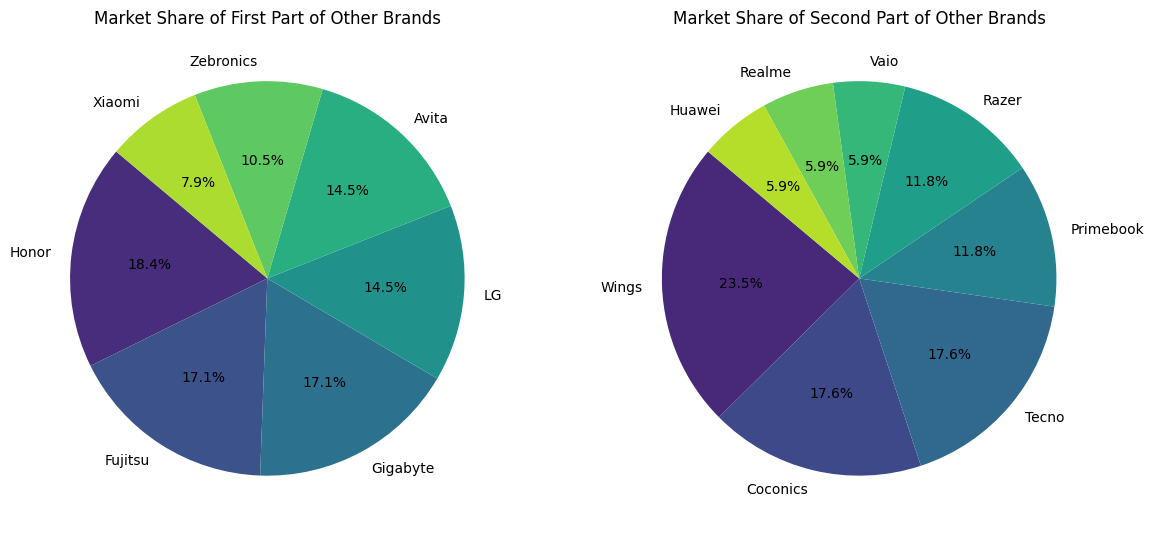

In [21]:
# Step 3: Split these counts into two parts
half = len(other_brands_counts) // 2
other_brands_part1 = other_brands_counts[:half]
other_brands_part2 = other_brands_counts[half:]

# Step 4: Plot two side-by-side pie charts for these two parts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plotting the first pie chart for the first part of 'Other' brands
ax1.pie(other_brands_part1, labels=other_brands_part1.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(other_brands_part1)))
ax1.set_title('Market Share of First Part of Other Brands')

# Plotting the second pie chart for the second part of 'Other' brands
ax2.pie(other_brands_part2, labels=other_brands_part2.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(other_brands_part2)))
ax2.set_title('Market Share of Second Part of Other Brands')

plt.show()

In [22]:
df['Price_Range'].value_counts()

Price_Range
Economy      1026
Mid-Range     750
Luxury        440
Premium       292
Budget        161
Name: count, dtype: int64

In [23]:
# Count the occurrences of each unique value in the 'Price_Range' column
price_range_counts = df['Price_Range'].value_counts()

# Create a bar chart using Plotly
fig = px.bar(
    x=price_range_counts.index,
    y=price_range_counts.values,
    title='Distribution of Price Ranges',
    labels={'x': 'Price Range', 'y': 'Frequency'},
    text=price_range_counts.values
)

# Update the layout for better presentation
fig.update_layout(
    xaxis_title='Price Range',
    yaxis_title='Frequency',
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Show the plot
fig.show()


The bar chart above shows the distribution of laptops across different price ranges. Here are some observations:


Economy laptops are the most common, with 1026 entries.

Mid-Range laptops are the next most frequent, with 750 entries.

Luxury and Premium laptops have 440 and 292 entries, respectively.

Budget laptops are the least common, with 161 entries.

In [24]:
# Create a pie chart using Plotly
fig = px.pie(
    names=price_range_counts.index,
    values=price_range_counts.values,
    title='Market Share of Price Ranges',
    labels={'names': 'Price Range', 'values': 'Frequency'}
)

# Update the layout for better presentation
fig.update_layout(
    template='plotly_white'
)

# Show the plot
fig.show()


In [26]:
# Calculate start and end prices for each price range category
price_ranges = df.groupby('Price_Range')['Price'].agg(['min', 'max'])

# Create a table for start and end prices of each price range category
table_data = go.Table(
    header=dict(
        values=['<b>Price Range</b>', '<b>Start Price (₹)</b>', '<b>End Price (₹)</b>'],
        fill_color='paleturquoise',
        align='left',
        font=dict(size=14)
    ),
    cells=dict(
        values=[
            price_ranges.index,
            price_ranges['min'].apply(lambda x: f"{x:,.0f}"),
            price_ranges['max'].apply(lambda x: f"{x:,.0f}")
        ],
        fill_color='lavender',
        align='left',
        font=dict(size=12)
    )
)

# Create the figure
fig_table = go.Figure(data=[table_data])

# Update the layout for better presentation
fig_table.update_layout(
    title='Start and End Prices for Each Price Category',
    title_x=0.5,
    template='plotly_white'
)

# Show the table
fig_table.show()


In [27]:
# Calculate start and end prices for each price range category
price_ranges = df.groupby('Price_Range')['Price'].agg(['min', 'max'])

# Create the pie chart for market share
fig_pie = px.pie(
    names=price_range_counts.index,
    values=price_range_counts.values,
    title='Market Share of Price Ranges',
    labels={'names': 'Price Range', 'values': 'Frequency'},
    hole=0.4
)

# Create the bar chart for price ranges with annotations for all categories
fig_bar = go.Figure()

fig_bar.add_trace(go.Bar(
    x=price_range_counts.index,
    y=price_range_counts.values,
    text=price_range_counts.values,
    textposition='auto',
    marker_color='skyblue'
))

# Add annotations for each price range category
for category in price_ranges.index:
    fig_bar.add_trace(go.Scatter(
        x=[category, category],
        y=[0, price_range_counts[category]],
        mode='lines+markers+text',
        text=[f"Start Price: ₹{price_ranges.loc[category, 'min']}", f"End Price: ₹{price_ranges.loc[category, 'max']}"],
        textposition="top center",
        line=dict(color='gray', dash='dash'),
        showlegend=False
    ))

fig_bar.update_layout(
    title='Price Range Distribution with Start and End Prices',
    xaxis_title='Price Range',
    yaxis_title='Frequency',
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Combine both charts into a single figure
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'xy'}]],
                    subplot_titles=('Market Share of Price Ranges', 'Price Range Distribution'))

# Add the pie chart and bar chart to the subplots
fig.add_trace(fig_pie.data[0], row=1, col=1)
fig.add_trace(fig_bar.data[0], row=1, col=2)

for trace in fig_bar.data[1:]:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Market Share and Price Range Details",
    annotations=[dict(text='Market Share', x=0.17, y=0.5, font_size=12, showarrow=False)]
)

# Show the plot
fig.show()


In [28]:
# Count the occurrences of each unique value in the 'Utility' column
utility_counts = df['Utility'].value_counts()
utility_counts

Utility
Everyday Use    1955
Gaming           373
Ultrabook        240
Personal          67
Business          34
Name: count, dtype: int64

In [29]:
# Create a bar chart using Plotly with color based on the number of entries
fig = px.bar(
    x=utility_counts.index,
    y=utility_counts.values,
    title='Distribution of Utility Categories',
    labels={'x': 'Utility', 'y': 'Frequency'},
    text=utility_counts.values,
    color=utility_counts.values,
    color_continuous_scale='Viridis'
)

# Update the layout for better presentation
fig.update_layout(
    xaxis_title='Utility',
    yaxis_title='Frequency',
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Show the plot
fig.show()



The bar chart above shows the distribution of utility categories. Here are some key observations:


Everyday Use laptops are the most common, with 1955 entries.

Gaming laptops are the second most frequent, with 373 entries.

Ultrabook laptops have 240 entries.

Personal and Business categories are the least common, with 67 and 34 entries, respectively.

In [30]:
# Create a pie chart using Plotly
fig = px.pie(
    names=utility_counts.index,
    values=utility_counts.values,
    title='Market Share of Utility Categories',
    labels={'names': 'Utility', 'values': 'Frequency'},
    hole=0.4,  # To create a donut chart, set hole size
    color=utility_counts.index,
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Update the layout for better presentation
fig.update_layout(
    template='plotly_white'
)

# Show the plot
fig.show()


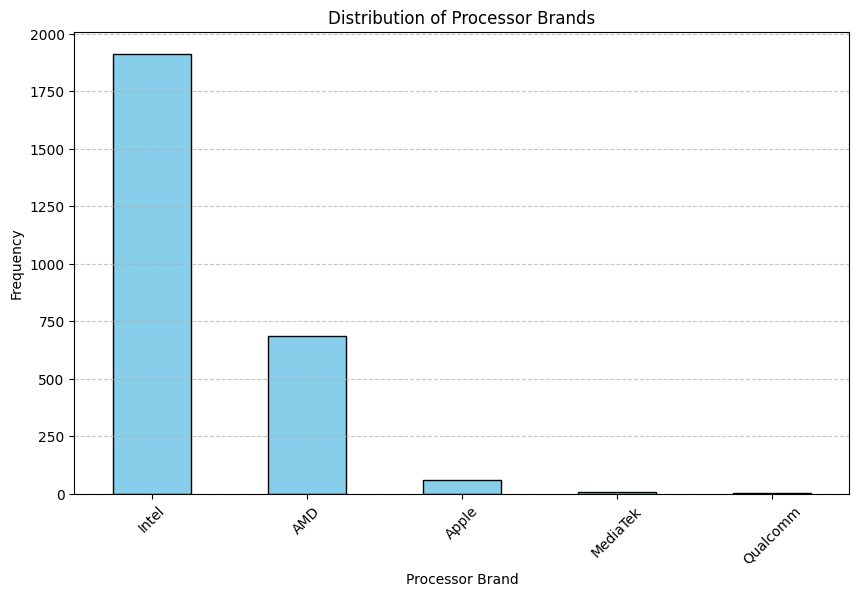

In [31]:
# Count the occurrences of each unique value in the 'Processor_Brand' column
processor_brand_counts = df['Processor_Brand'].value_counts()

# Plot the distribution of Processor Brand
plt.figure(figsize=(10, 6))
processor_brand_counts.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Distribution of Processor Brands')
plt.xlabel('Processor Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [32]:
# Create a pie chart using Plotly
fig = px.pie(
    names=processor_brand_counts.index,
    values=processor_brand_counts.values,
    title='Market Share of Processor Brands',
    labels={'names': 'Processor Brand', 'values': 'Frequency'},
    hole=0.4,  # To create a donut chart, set hole size
    color=processor_brand_counts.index,
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Update the layout for better presentation
fig.update_layout(
    template='plotly_white'
)

# Show the plot
fig.show()


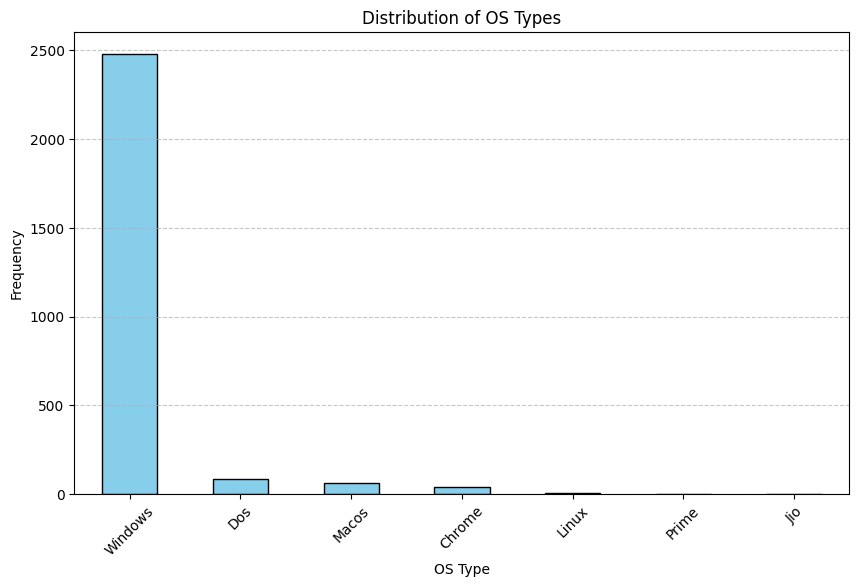

In [33]:
# Count the occurrences of each unique value in the 'OS Type' column
os_type_counts = df['OS Type'].value_counts()

# Plot the distribution of OS Type
plt.figure(figsize=(10, 6))
os_type_counts.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Distribution of OS Types')
plt.xlabel('OS Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar chart above shows the distribution of operating system (OS) types. Here are some key observations:


The most common OS types are clearly visible from the chart.

The frequencies of each OS type are displayed, giving insight into the popularity or market share of each OS within this dataset.

In [34]:
# Create a pie chart using Plotly
fig = px.pie(
    names=os_type_counts.index,
    values=os_type_counts.values,
    title='Market Share of OS Types',
    labels={'names': 'OS Type', 'values': 'Frequency'},
    hole=0.4,  # To create a donut chart, set hole size
    color=os_type_counts.index,
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Update the layout for better presentation
fig.update_layout(
    template='plotly_white'
)

# Show the plot
fig.show()


In [35]:
# Count the occurrences of each unique value in the 'Graphics_Brand' column
graphics_brand_counts = df['Graphics_Brand'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(
    names=graphics_brand_counts.index,
    values=graphics_brand_counts.values,
    title='Market Share of Graphics Brands',
    labels={'names': 'Graphics Brand', 'values': 'Frequency'},
    hole=0.4,  # To create a donut chart, set hole size
    color=graphics_brand_counts.index,
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Update the layout for better presentation
fig.update_layout(
    template='plotly_white'
)

# Show the plot
fig.show()


The bar chart above shows the distribution of graphics brands. Here are some key observations:


The most common graphics brands are clearly visible from the chart.

The frequencies of each graphics brand are displayed, providing insight into the popularity or market share of each brand within this dataset.

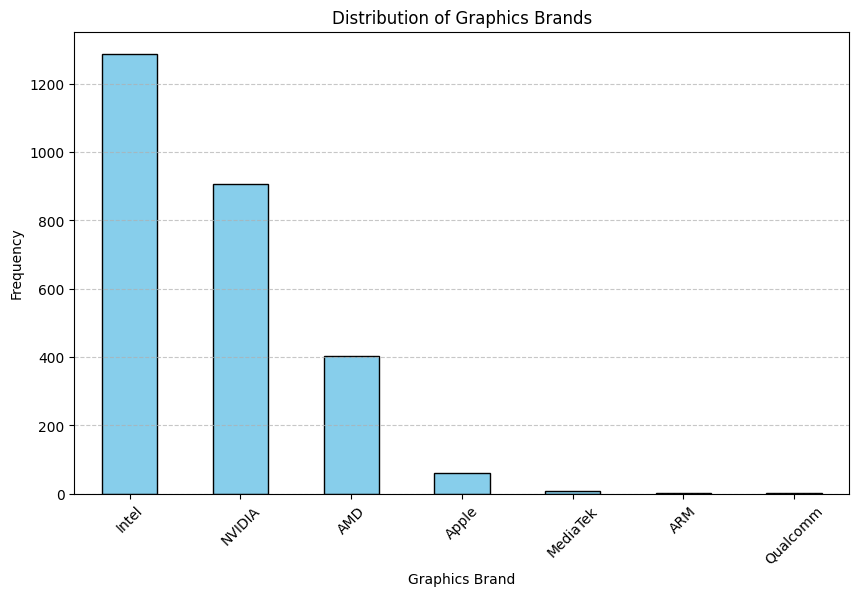

In [36]:

# Plot the distribution of Graphics Brand
plt.figure(figsize=(10, 6))
graphics_brand_counts.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Distribution of Graphics Brands')
plt.xlabel('Graphics Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


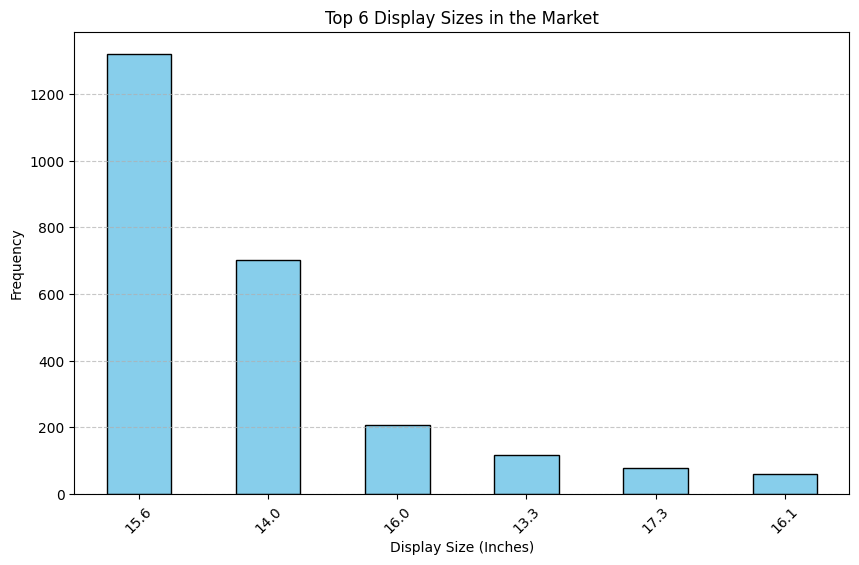

In [37]:
# Count the occurrences of each unique value in the 'Display Size (Inches)' column
display_size_counts = df['Display Size (Inches)'].value_counts().nlargest(6)

# Plot the top 6 display sizes
plt.figure(figsize=(10, 6))
display_size_counts.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Top 6 Display Sizes in the Market')
plt.xlabel('Display Size (Inches)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


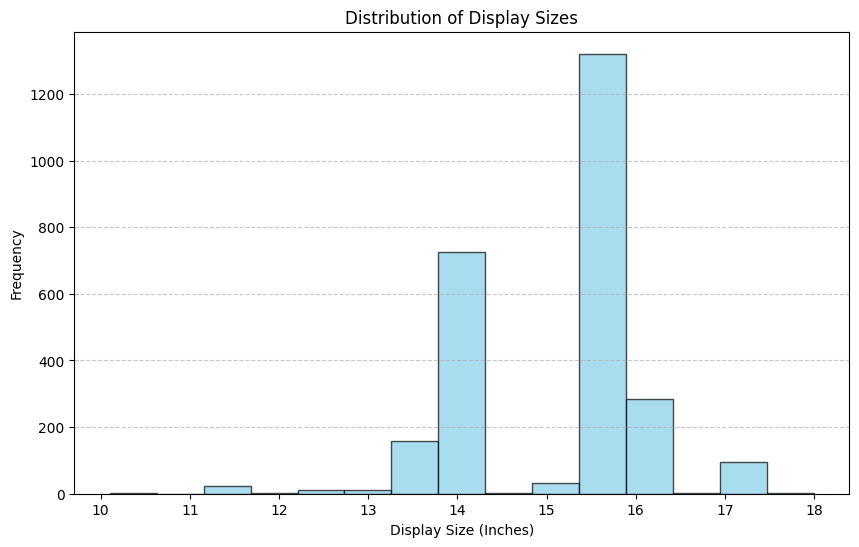

In [38]:
# Plot the distribution of display sizes
plt.figure(figsize=(10, 6))
plt.hist(df['Display Size (Inches)'], bins=15, color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Distribution of Display Sizes')
plt.xlabel('Display Size (Inches)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The histogram above shows the distribution of display sizes in the dataset. Here are some key observations:


The distribution of display sizes reveals the most common screen sizes.

There are peaks at specific sizes, indicating popular choices among manufacturers and consumers.

The spread of the data shows the range of display sizes available in the market.

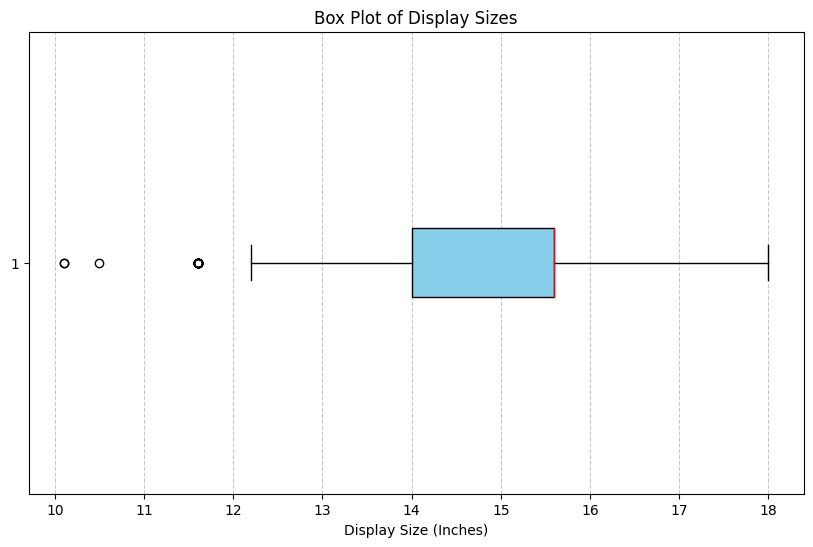

In [39]:
# Plot the box plot for display sizes
plt.figure(figsize=(10, 6))
plt.boxplot(df['Display Size (Inches)'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='k'),
            whiskerprops=dict(color='k'),
            capprops=dict(color='k'),
            medianprops=dict(color='red'))

plt.title('Box Plot of Display Sizes')
plt.xlabel('Display Size (Inches)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


The box plot above shows the central tendency, spread, and potential outliers for display sizes in the dataset. Here are some key observations:


The median display size is highlighted in red, indicating the central value.

The interquartile range (IQR) represents the middle 50% of the data.

Whiskers extend to show the range of the data, excluding outliers.

Any data points outside the whiskers are considered potential outliers.

In [40]:
df.columns

Index(['Brand', 'Spec_Score', 'Model_Name', 'Series', 'Price', 'Price_Range',
       'Utility', 'Processor_Brand', 'Core Configuration', 'Clock-speed',
       'OS Type', 'RAM Type', 'Ram_Capacity(GB)', 'Graphics_Brand',
       'Display Size (Inches)', 'Resolution Width', 'Resolution Height', 'PPI',
       'Aspect Ratio', 'Weight(kg)', 'Touchscreen', 'Screen_Protection',
       'Colour(s)', 'Outlier_Flag', 'Original_Brand'],
      dtype='object')

we will create a bar chart to visually explore the distribution of the Touchscreen feature.


Here is a brief description of the chart:

Title: Distribution of Touchscreen Feature in Laptops

X-axis: Touchscreen availability (Yes or No)

Y-axis: Number of laptops

Description: This bar chart shows the number of laptops that have a touchscreen feature (Yes) versus those that do not (No).

It helps in understanding the prevalence of touchscreen features in the dataset.

In [44]:
# Value counts for the Touchscreen column
touchscreen_counts = df['Touchscreen'].value_counts()
touchscreen_counts


Touchscreen
No     2338
Yes     331
Name: count, dtype: int64

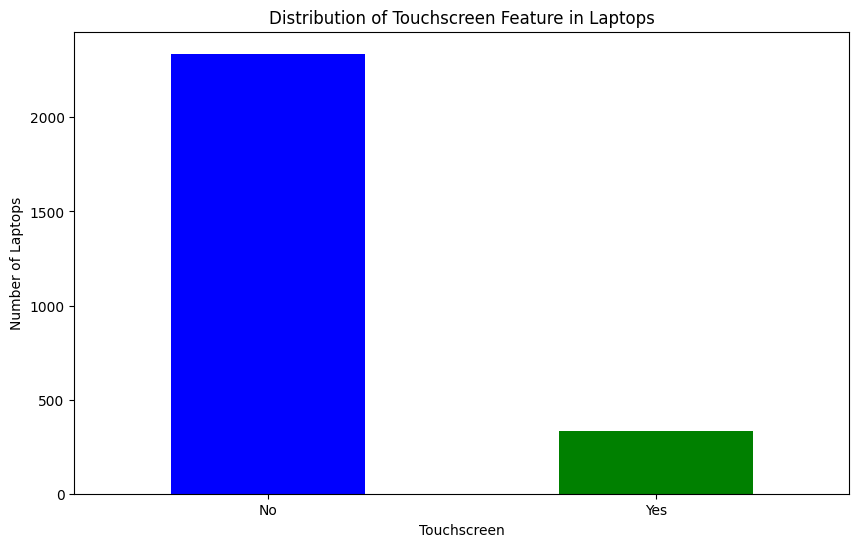

In [45]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
touchscreen_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Touchscreen Feature in Laptops')
plt.xlabel('Touchscreen')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=0)
plt.show()
